# Vapor - Liquid Equilibria (Water + Furfuryl Alcohol)

In [11]:
import numpy as np
from epcsaftpy import component, pcsaft
from sgtpy.equilibrium import bubbleTy, lle, lle_init          # sgtpy module
import matplotlib.pyplot as plt

**Parameters Water from:**<br />
L. Cameretti, G. Sadowski. Chem. Eng. Process. 47, 1018-1025 (2008). https://doi.org/10.1016/j.cep.2007.02.034 <br /><br />

**Parameters Furfuryl Alcohol:**<br />
This work

In [12]:
Water = component('Water', ms = 1.2046817736, sigma = [2.7927, 10.11, -0.01775, -1.417, -0.01146], eps = 353.9449,
                 kappaAB = 0.045090, eAB = 2425.6714, sites = [0, 1, 1], Mw = 18.01528)
FA = component('Furfuryl Alcohol', ms = 4.361081, sigma = 3.004829 , eps = 218.33885, 
               kappaAB = 0.14622, eAB = 1834.334, sites = [0, 1, 2], Mw = 98.1014)
mix = Water + FA
saft = pcsaft(mix)
saft_Water = pcsaft(Water)
saft_FA = pcsaft(FA)

**Calculation**<br />
VLE calculation using sgtpy module (https://github.com/gustavochm/sgtpy)

In [13]:
P = 7330.                        # Pressure [Pa]

n = 100
x10 = 1.       
x1f = 0.
x1 = np.linspace(x10, x1f, n)    # mol fracction vector 
x = np.array([x1, 1 - x1]).T
T = []
xW = []
yW = []

T0 = 300.
y0 = x[0]
T0, vL0, vV0 = saft_Water.tsat(P, T0 = T0)
v0 = np.array([vL0, vV0])
Xass0 = [None, None]
for i in range(n):
    out = bubbleTy(y0, T0, x[i], P, saft, good_initial = True,
                     v0 = v0, Xass0 = Xass0, full_output = True)
    Xass0 = np.array([out.Xassl, out.Xassv])
    v0 = np.array([out.v1, out.v2])
    y0 = out.Y
    T0 = out.T
    T.append(T0), xW.append(x1[i]), yW.append(y0[0])

**Plotting**<br />
Experimental information were retrieved from the ASPEN data base.

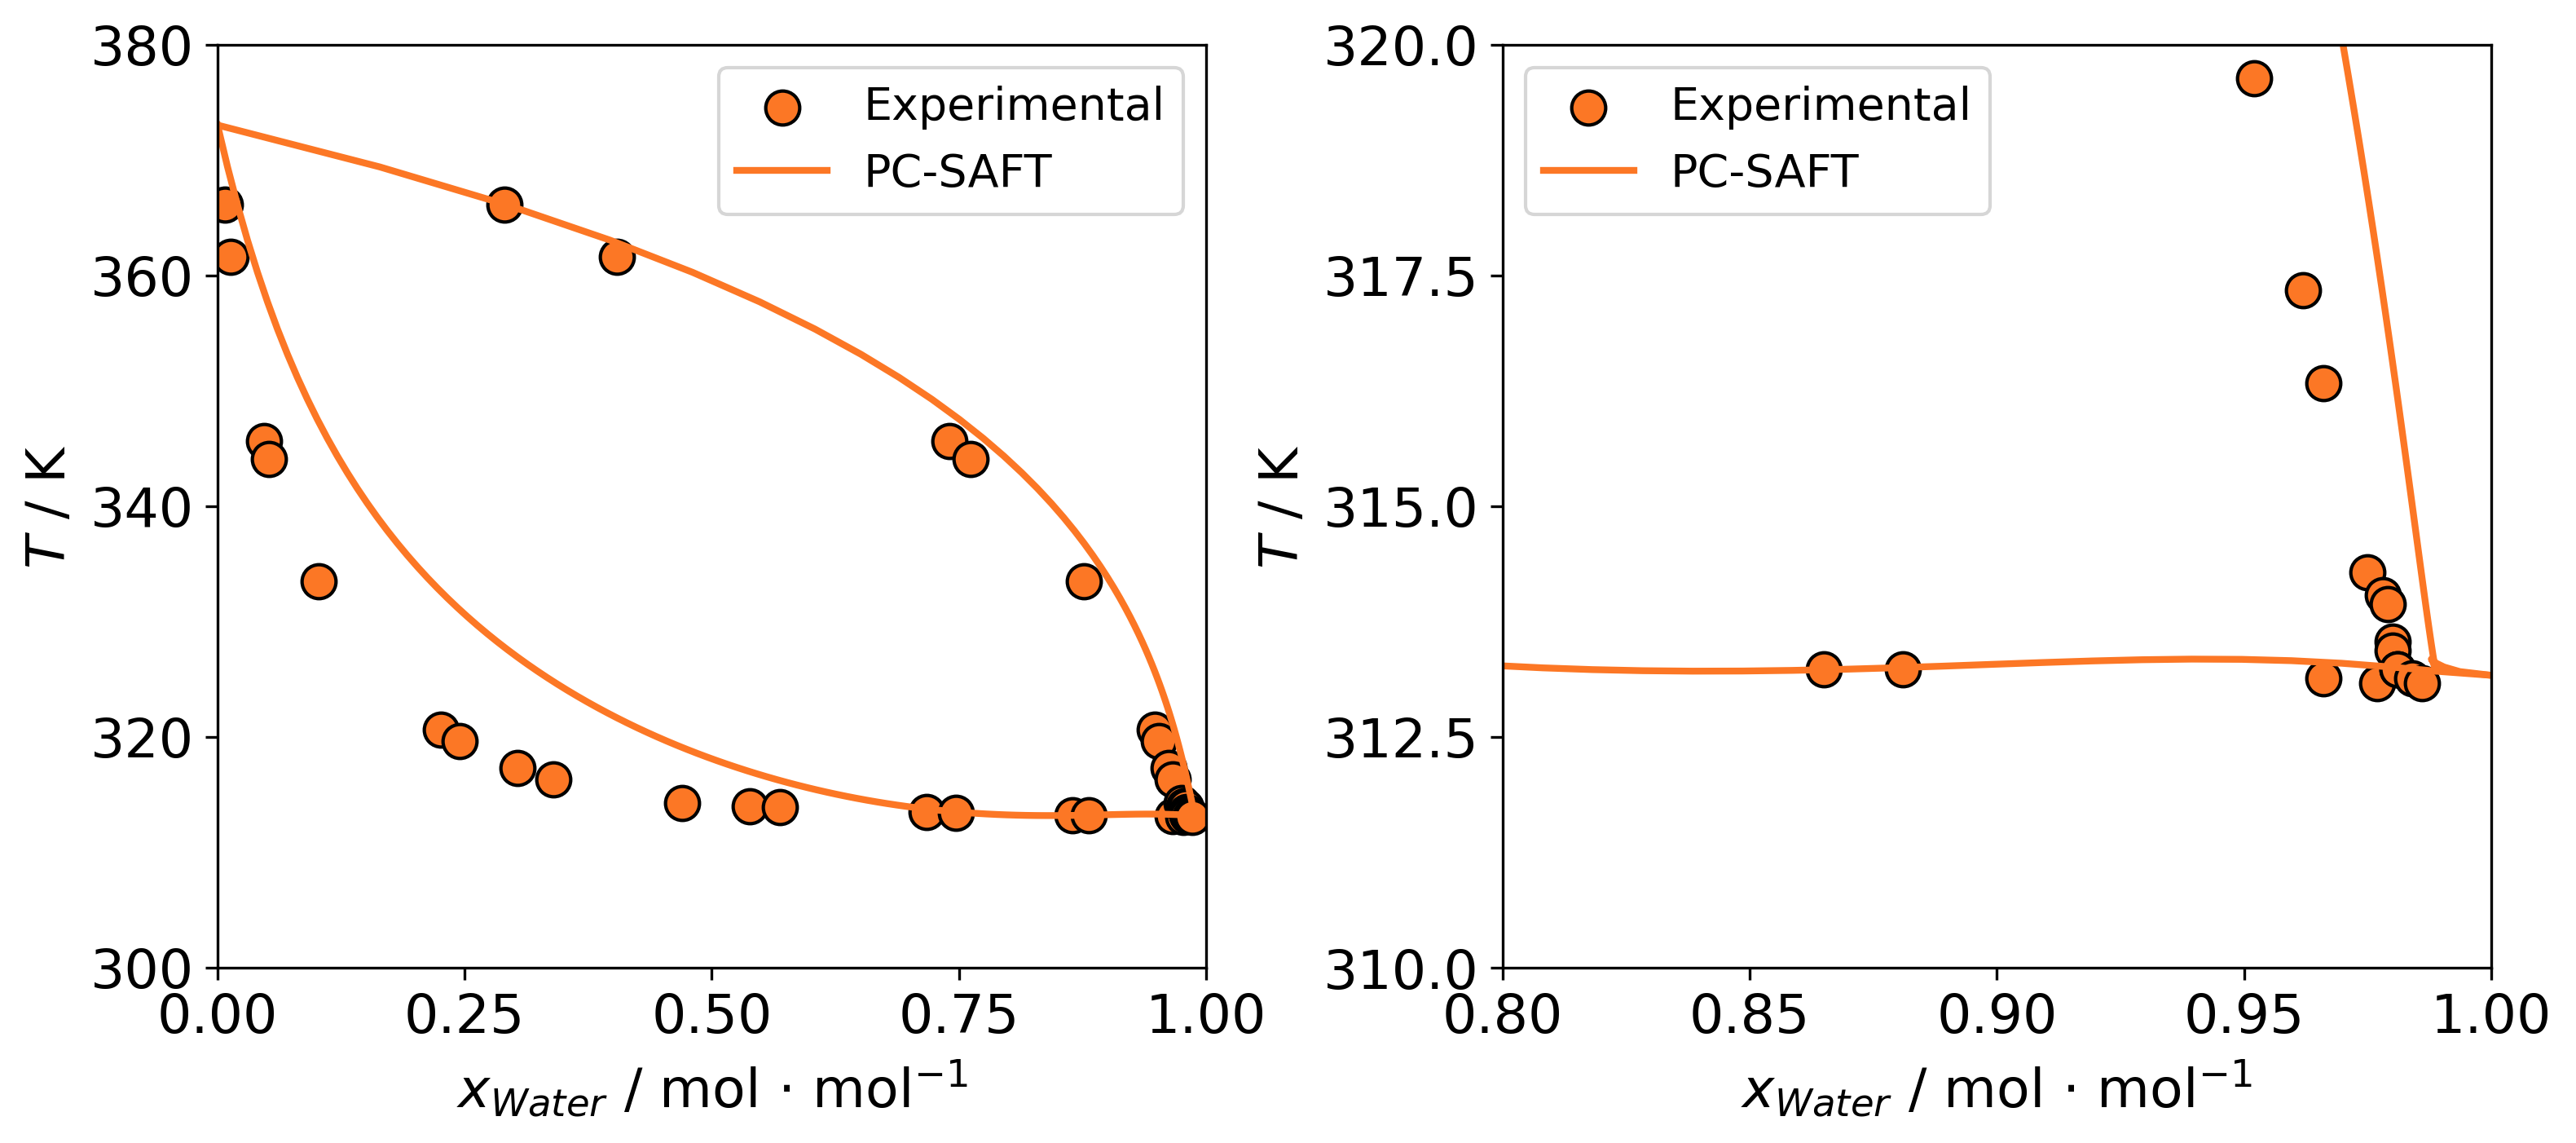

In [14]:
Texp = np.array([366.12577, 361.62667, 345.68129, 344.131755,
                 333.53429, 320.637805, 319.638105, 317.338795,
                 316.339095, 314.28971, 314.039785, 313.939815,
                 313.539935, 313.439965, 313.240025, 313.240025,
                 313.140055, 313.09007])
xWexp = np.array([0.0075, 0.013, 0.047, 0.052, 0.102, 0.226,
                  0.245, 0.303, 0.34, 0.47, 0.538, 0.569,
                  0.717, 0.747, 0.865, 0.881, 0.966, 0.977])
yWexp = np.array([0.29, 0.404, 0.74, 0.762, 0.876, 0.948, 
                  0.952, 0.962, 0.966, 0.975, 0.978, 0.979,
                  0.98, 0.98, 0.981, 0.981, 0.984, 0.986])

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axs[0]
ax.scatter(xWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.scatter(yWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(xW, T, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(yW, T, color = colorVLE , 
        linewidth = 2.0)

ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / mol $\cdot$ mol$^{-1}$')
ax.axis([0, 1., 300, 380])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))


ax = axs[1]
ax.scatter(xWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.scatter(yWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(xW, T, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(yW, T, color = colorVLE , 
        linewidth = 2.0)

ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / mol $\cdot$ mol$^{-1}$')
ax.axis([0.8, 1., 310, 320])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

plt.show()

# Vapor - Liquid Equilibria (Water + Furfuryl Alcohol)
## At 7330 Pa

In [15]:
from sgtpy.equilibrium import vlle, vlleb
P = 7330.                        # Pressure [Pa]
# initial guesses
T0 = 310. # K
z = np.array([0.75, 0.25])
x0, w0 = lle_init(z, T0, P, saft)
y0 = np.array([0.98, 0.2])

out = vlleb(x0, w0, y0, T0, P, 'P', saft, full_output=True)
xvlle = out.X
wvlle = out.W
yvlle = out.Y
Tvlle = out.T
print(out)

      T: 313.31908441950605
      P: 7330.0
  error: 4.019345723133573e-11
   nfev: 16
      X: array([0.96409779, 0.03590221])
     vx: 2.0614206884951932e-05
  Xassx: array([0.04191177, 0.07428932, 0.05187201, 0.09121173])
 statex: 'Liquid'
      W: array([0.78632233, 0.21367767])
     vw: 3.2920764855661746e-05
  Xassw: array([0.0260201 , 0.18577885, 0.03237231, 0.22223433])
 statew: 'Liquid'
      Y: array([0.98844215, 0.01155785])
     vy: 0.35389301617170305
  Xassy: array([0.99615844, 0.99619295, 0.99699428, 0.99702128])
 statey: 'Vapor'


In [16]:
## V-L1
n = 20
x10 = xvlle[0]  
T0 = np.copy(Tvlle)
y0 = np.copy(yvlle)
x1f = 1
x1A = np.linspace(x10, x1f, n)    
xA = np.array([x1A, 1 - x1A]).T


TA = []
xWA = []
yWA = []

v0 = [None, None]
Xass0 = [None, None]
for i in range(n):
    out = bubbleTy(y0, T0, xA[i], P, saft, good_initial = True,
                     v0 = v0, Xass0 = Xass0, full_output = True)
    Xass0 = np.array([out.Xassl, out.Xassv])
    v0 = np.array([out.v1, out.v2])
    y0 = out.Y
    T0 = out.T
    TA.append(T0), xWA.append(x1A[i]), yWA.append(y0[0])
    
## V-L2
n = 50
x10 = wvlle[0]  
T0 = np.copy(Tvlle)
y0 = np.copy(yvlle)
x1f = 0
x1B = np.linspace(x10, x1f, n)    
xB = np.array([x1B, 1 - x1B]).T

TB = []
xWB = []
yWB = []

v0 = [None, None]
Xass0 = [None, None]
for i in range(n):
    out = bubbleTy(y0, T0, xB[i], P, saft, good_initial = True,
                     v0 = v0, Xass0 = Xass0, full_output = True)
    Xass0 = np.array([out.Xassl, out.Xassv])
    v0 = np.array([out.v1, out.v2])
    y0 = out.Y
    T0 = out.T
    TB.append(T0), xWB.append(x1B[i]), yWB.append(y0[0])

## L1-L2
w0 = np.copy(wvlle)
x0 = np.copy(xvlle)
T0 = np.copy(Tvlle)
Tf = 300.
T = np.linspace(T0, Tf, n)   
v0 = [None, None]
Xass0 = [None, None]
TC = []
xWC = []
wWC = []
for i in range(n):
    z = (x0 +  w0)/2
    out = lle(x0, w0, z, T[i], P, saft,
            v0 = v0, Xass0 = Xass0, full_output = True)
    Xass0 = out.Xass
    v0 = out.v
    W0 = out.X[0]
    X0 = out.X[1]
    TC.append(T[i]), xWC.append(x0[0]), wWC.append(w0[0])

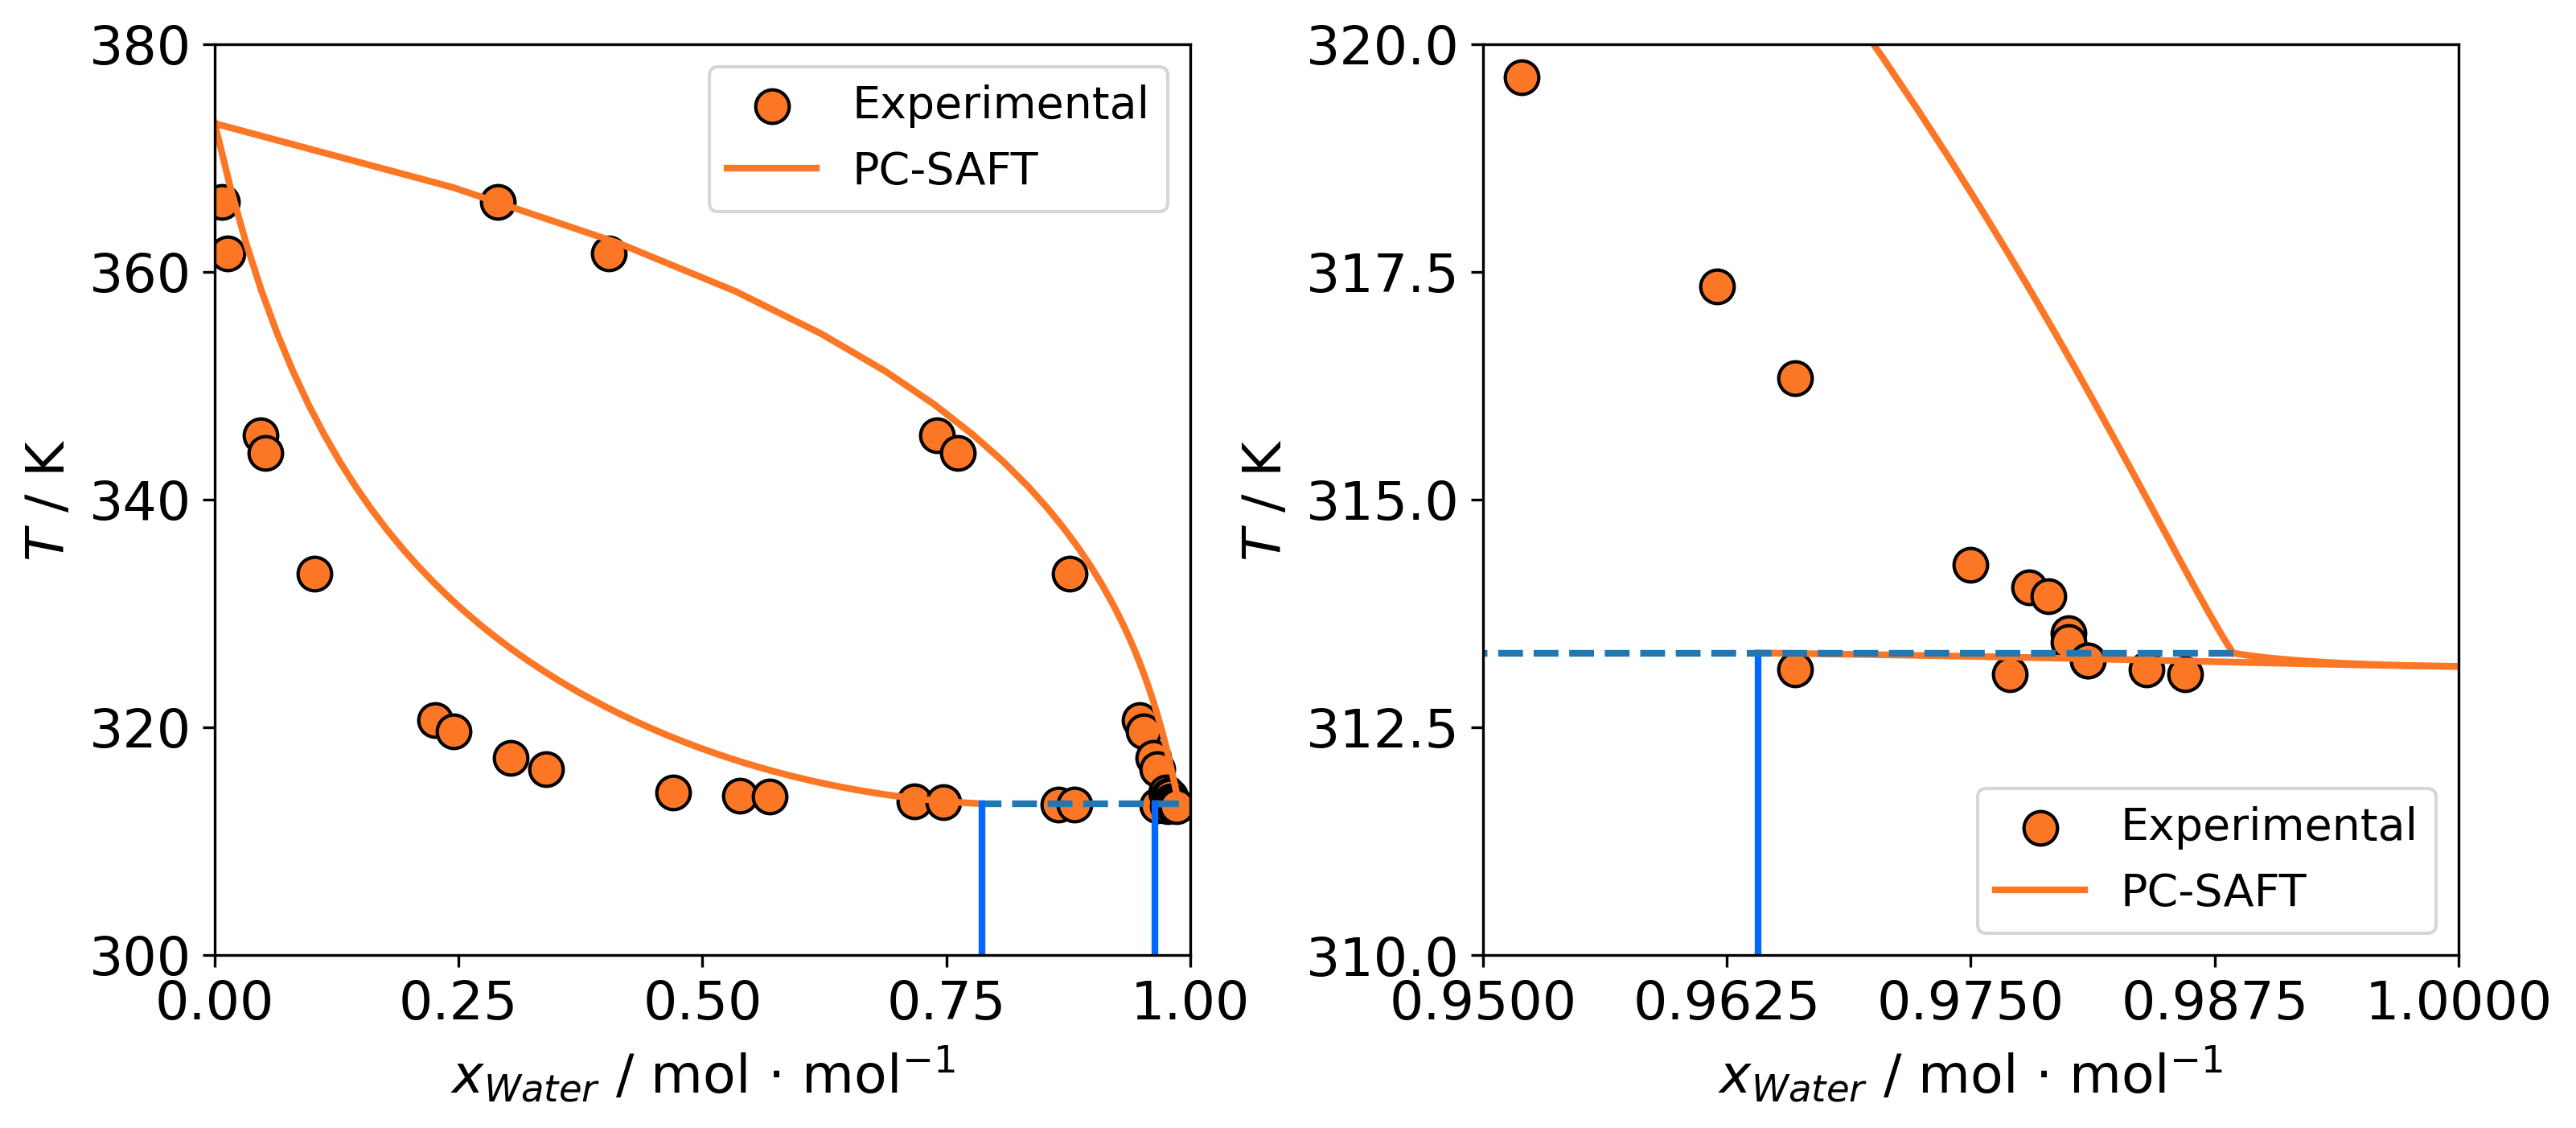

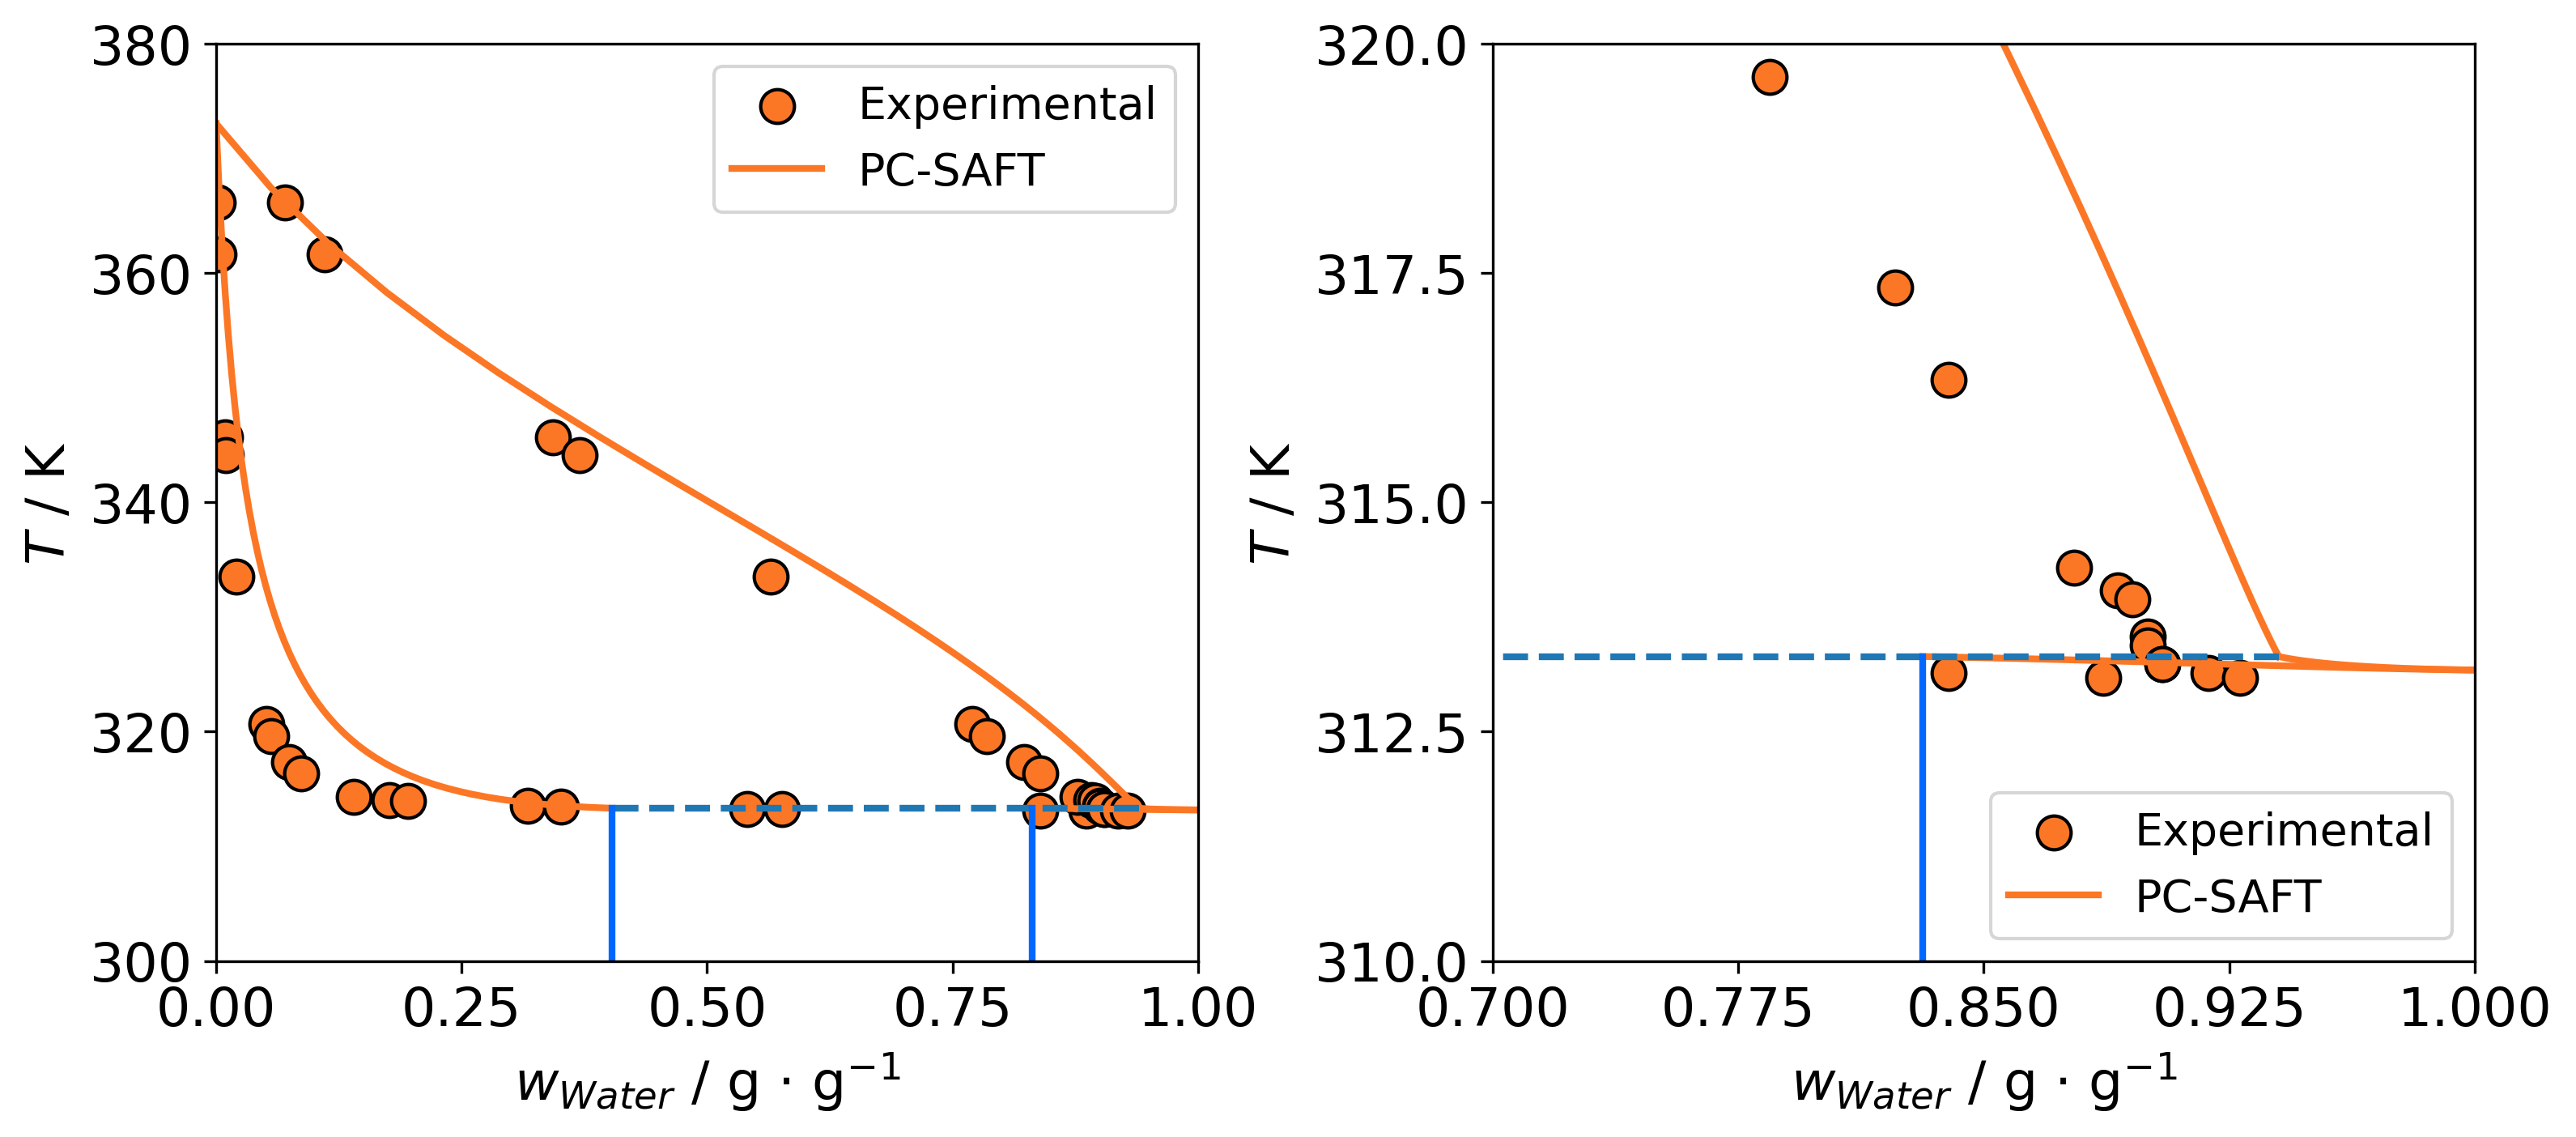

In [17]:
def mol_to_mass(x1):
    if type(x1)== list:
        x1 = np.array(x1)
    return x1*saft.Mw[0]/(x1*saft.Mw[0] + (1 - x1)*saft.Mw[1])

Texp = np.array([366.12577, 361.62667, 345.68129, 344.131755,
                 333.53429, 320.637805, 319.638105, 317.338795,
                 316.339095, 314.28971, 314.039785, 313.939815,
                 313.539935, 313.439965, 313.240025, 313.240025,
                 313.140055, 313.09007])
xWexp = np.array([0.0075, 0.013, 0.047, 0.052, 0.102, 0.226,
                  0.245, 0.303, 0.34, 0.47, 0.538, 0.569,
                  0.717, 0.747, 0.865, 0.881, 0.966, 0.977])
yWexp = np.array([0.29, 0.404, 0.74, 0.762, 0.876, 0.948, 
                  0.952, 0.962, 0.966, 0.975, 0.978, 0.979,
                  0.98, 0.98, 0.981, 0.981, 0.984, 0.986])

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

colorLLE = "#0068FF"
colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axs[0]
ax.scatter(xWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.scatter(yWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(xWA, TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(yWA, TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(xWB, TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(yWB, TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot([yvlle[0], xvlle[0], wvlle[0]], [Tvlle, Tvlle, Tvlle], 
        linewidth = 2.0,  linestyle = "dashed")
ax.plot(xWC, TC, color = colorLLE , 
        linewidth = 2.0)
ax.plot(wWC, TC, color = colorLLE , 
        linewidth = 2.0)
ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / mol $\cdot$ mol$^{-1}$')
ax.axis([0, 1., 300, 380])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))


ax = axs[1]
ax.scatter(xWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.scatter(yWexp, Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(xWA, TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(yWA, TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(xWB, TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(yWB, TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(xWC, TC, color = colorLLE , 
        linewidth = 2.0)
ax.plot(wWC, TC, color = colorLLE , 
        linewidth = 2.0)
ax.plot([yvlle[0], xvlle[0], wvlle[0]], [Tvlle, Tvlle, Tvlle], 
        linewidth = 2.0, linestyle = "dashed")

ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / mol $\cdot$ mol$^{-1}$')
ax.axis([0.95, 1., 310, 320])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

plt.show()


fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axs[0]
ax.scatter(mol_to_mass(xWexp), Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.scatter(mol_to_mass(yWexp), Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(mol_to_mass(xWA), TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(mol_to_mass(yWA), TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(xWB), TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(yWB), TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass([yvlle[0], xvlle[0], wvlle[0]]), [Tvlle, Tvlle, Tvlle], 
        linewidth = 2.0,  linestyle = "dashed")
ax.plot(mol_to_mass(xWC), TC, color = colorLLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(wWC), TC, color = colorLLE , 
        linewidth = 2.0)
ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$w_{Water}$ / g $\cdot$ g$^{-1}$')
ax.axis([0, 1., 300, 380])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))


ax = axs[1]
ax.scatter(mol_to_mass(xWexp), Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.scatter(mol_to_mass(yWexp), Texp, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k')
ax.plot(mol_to_mass(xWA), TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(mol_to_mass(yWA), TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(xWB), TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(yWB), TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass([yvlle[0], xvlle[0], wvlle[0]]), [Tvlle, Tvlle, Tvlle], 
        linewidth = 2.0,  linestyle = "dashed")
ax.plot(mol_to_mass(xWC), TC, color = colorLLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(wWC), TC, color = colorLLE , 
        linewidth = 2.0)



ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$w_{Water}$ / g $\cdot$ g$^{-1}$')
ax.axis([0.7, 1., 310, 320])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

plt.show()

## At 1.013 bar

In [18]:
from sgtpy.equilibrium import vlle, vlleb
P = 1.013e5                      # Pressure [Pa]
# initial guesses
T0 = 350.
z = np.array([0.8, 0.2])
x0, w0 = lle_init(z, T0, P, saft)
y0 = np.array([0.97978236, 1 - 0.97978236])
out = vlleb(x0, w0, y0, T0, P, 'P', saft, full_output=True)
xvlle = out.X
wvlle = out.W
yvlle = out.Y
Tvlle = out.T
lle_bool = out.error < 1e-3

In [19]:
## V-L1
n = 20
x10 = xvlle[0]  
T0 = np.copy(Tvlle)
y0 = np.copy(yvlle)
x1f = 1
x1A = np.linspace(x10, x1f, n)    
xA = np.array([x1A, 1 - x1A]).T


TA = []
xWA = []
yWA = []

v0 = [None, None]
Xass0 = [None, None]
for i in range(n):
    out = bubbleTy(y0, T0, xA[i], P, saft, good_initial = True,
                     v0 = v0, Xass0 = Xass0, full_output = True)
    Xass0 = np.array([out.Xassl, out.Xassv])
    v0 = np.array([out.v1, out.v2])
    y0 = out.Y
    T0 = out.T
    TA.append(T0), xWA.append(x1A[i]), yWA.append(y0[0])
    
## V-L2
n = 50
x10 = wvlle[0]  
T0 = np.copy(Tvlle)
y0 = np.copy(yvlle)
x1f = 0
x1B = np.linspace(x10, x1f, n)    
xB = np.array([x1B, 1 - x1B]).T

TB = []
xWB = []
yWB = []

v0 = [None, None]
Xass0 = [None, None]
for i in range(n):
    out = bubbleTy(y0, T0, xB[i], P, saft, good_initial = True,
                     v0 = v0, Xass0 = Xass0, full_output = True)
    Xass0 = np.array([out.Xassl, out.Xassv])
    v0 = np.array([out.v1, out.v2])
    y0 = out.Y
    T0 = out.T
    TB.append(T0), xWB.append(x1B[i]), yWB.append(y0[0])

## L1-L2
if lle_bool:
    w0 = np.copy(wvlle)
    x0 = np.copy(xvlle)
    T0 = np.copy(Tvlle)
    Tf = 360.
    T = np.linspace(T0, Tf, n)   
    v0 = [None, None]
    Xass0 = [None, None]
    TC = []
    xWC = []
    wWC = []
    for i in range(n):
        z = (x0 +  w0)/2
        out = lle(x0, w0, z, T[i], P, saft,
                v0 = v0, Xass0 = Xass0, full_output = True)
        Xass0 = out.Xass
        v0 = out.v
        W0 = out.X[0]
        X0 = out.X[1]
        TC.append(T[i]), xWC.append(x0[0]), wWC.append(w0[0])

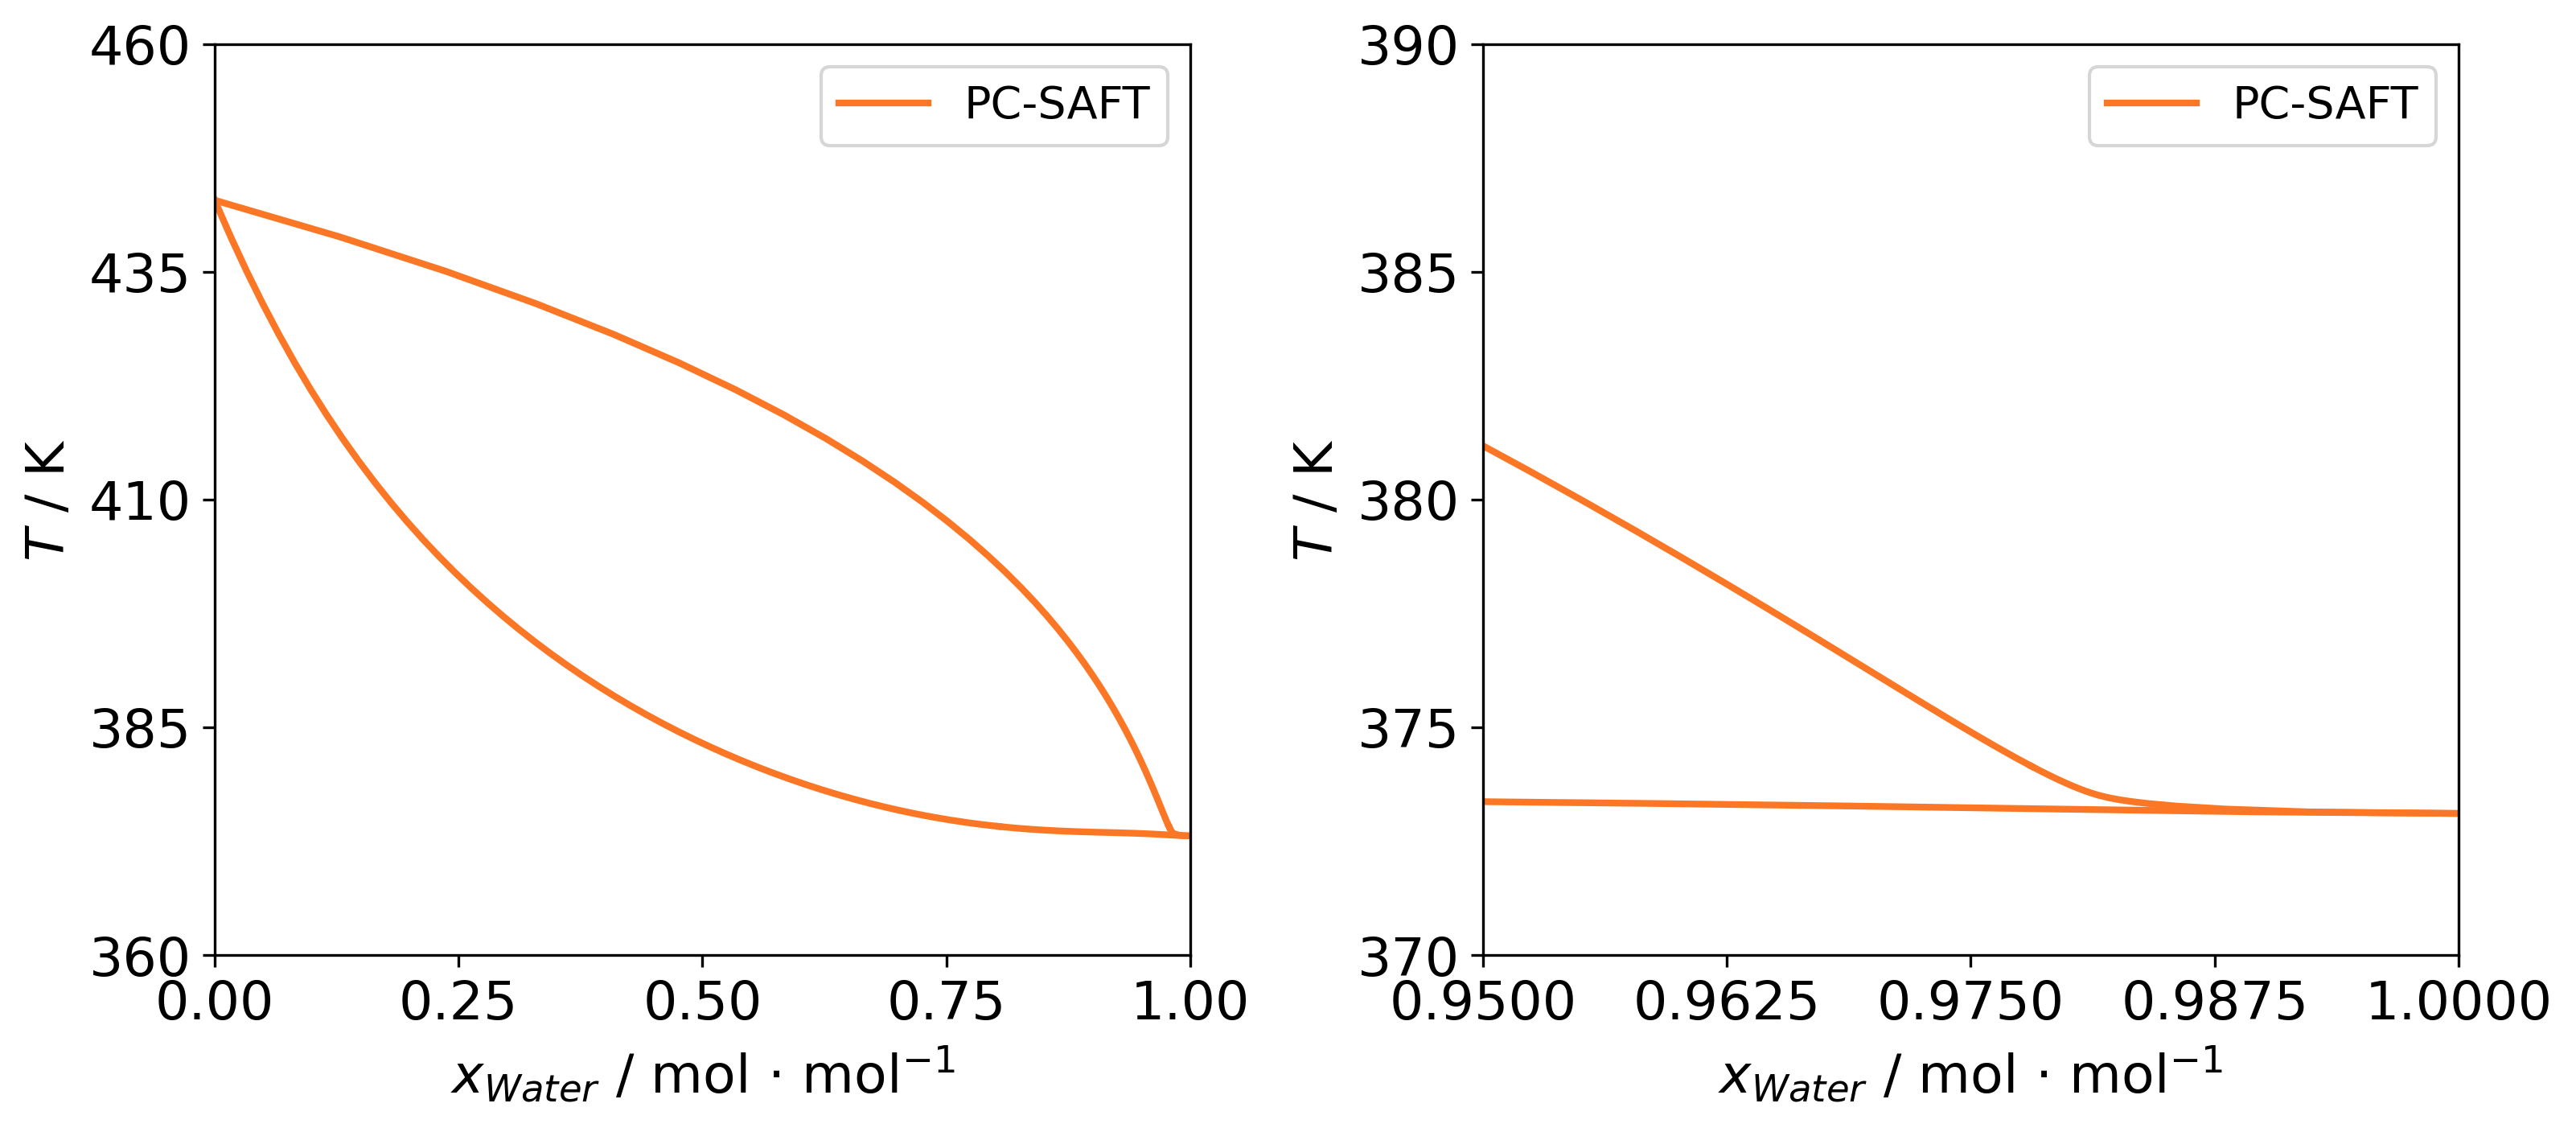

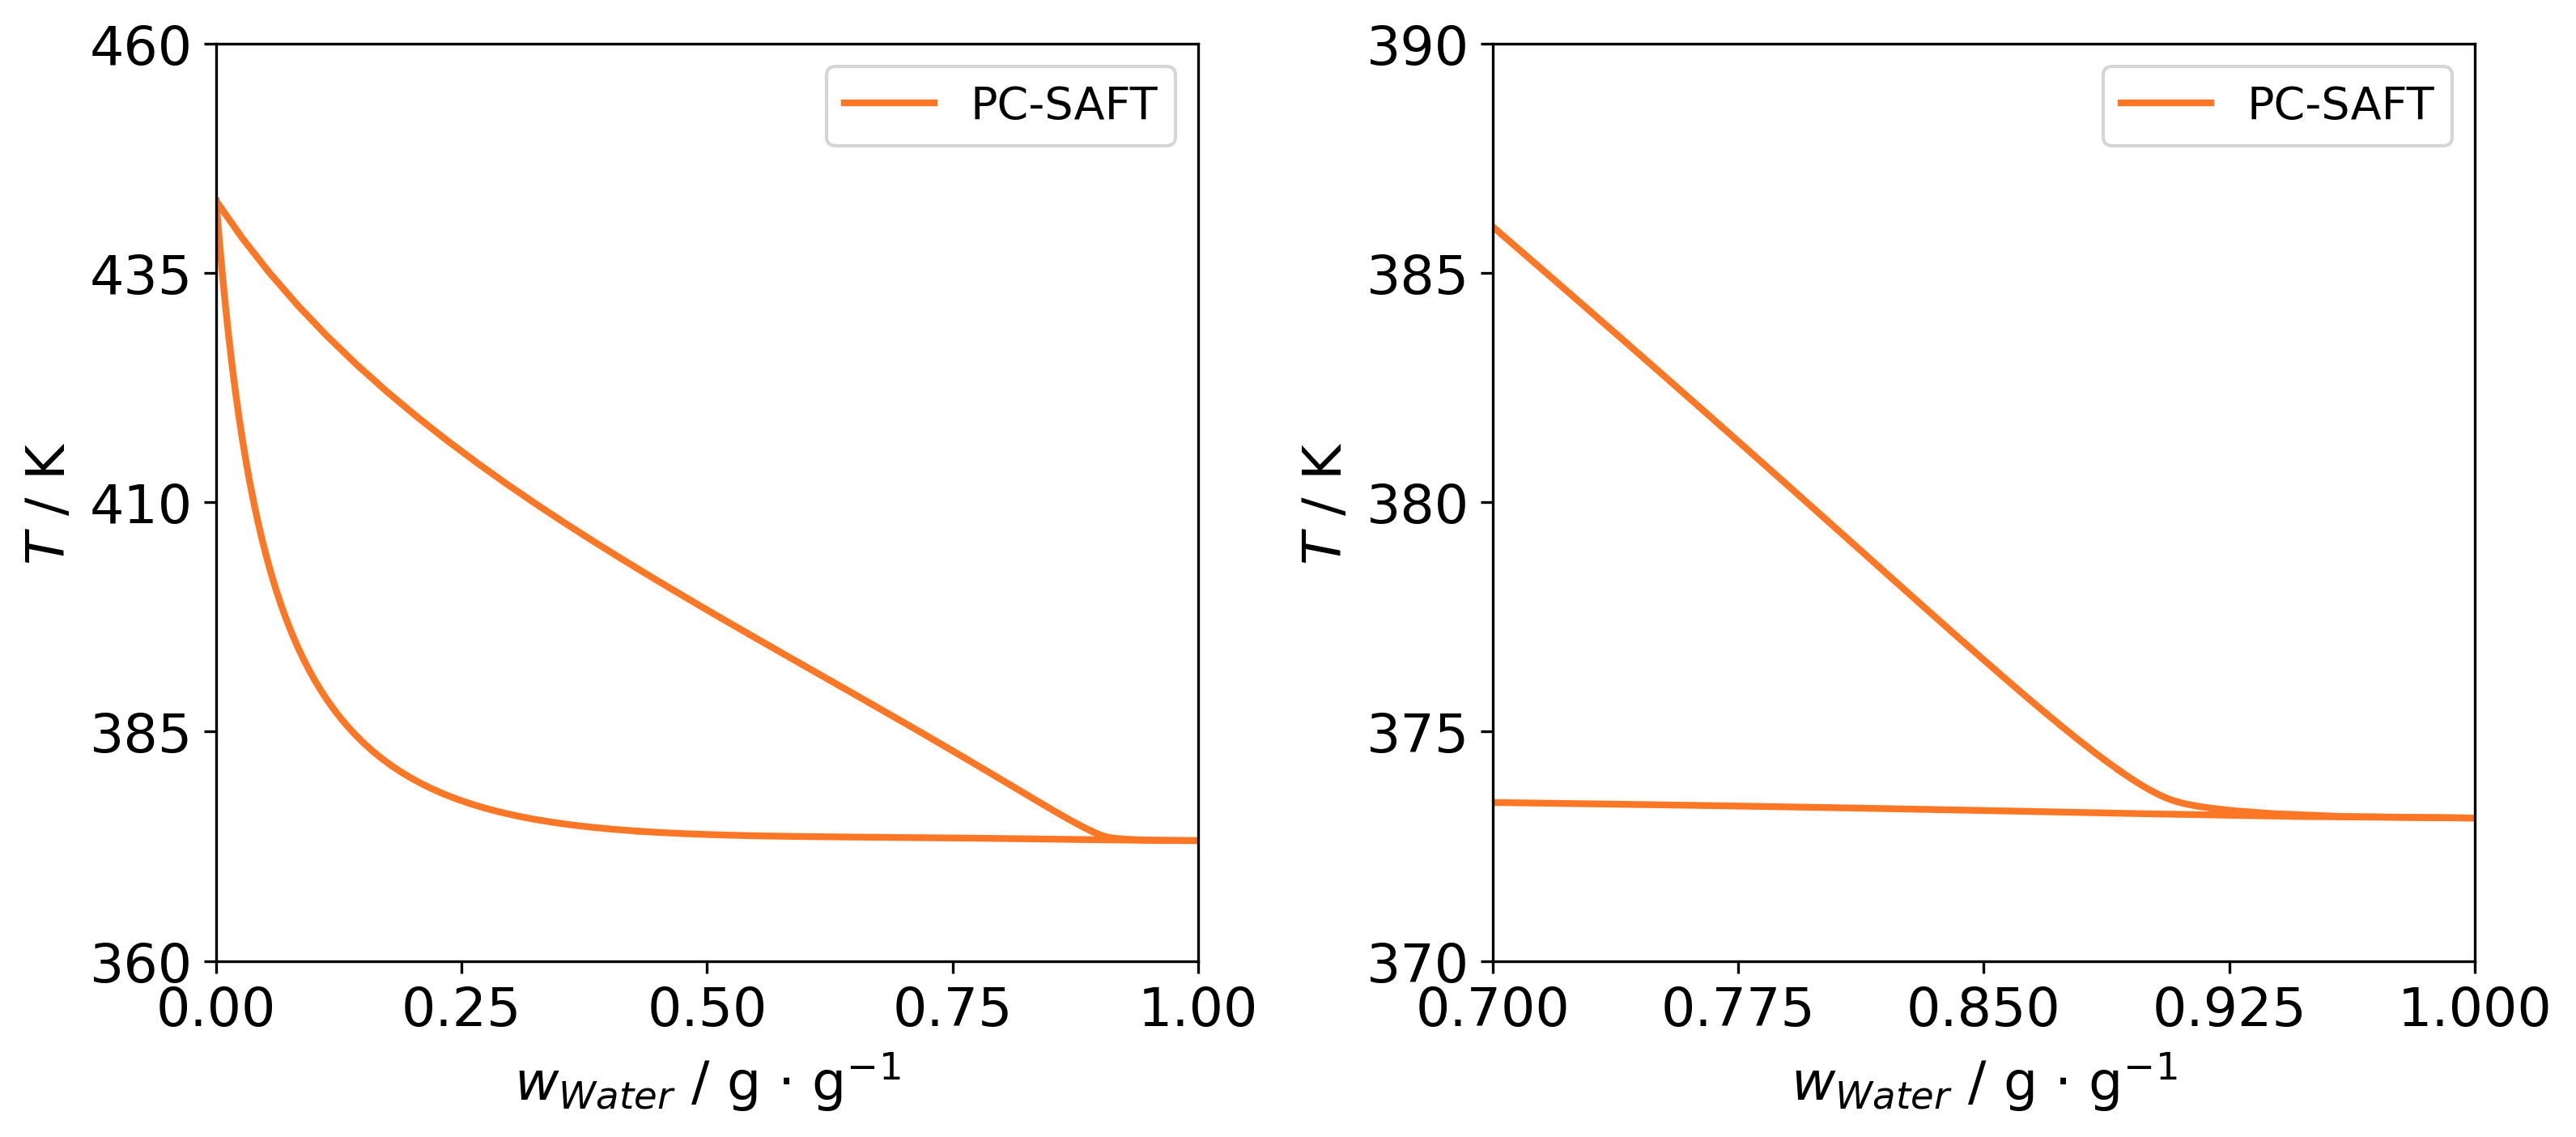

In [20]:
def mol_to_mass(x1):
    if type(x1)== list:
        x1 = np.array(x1)
    return x1*saft.Mw[0]/(x1*saft.Mw[0] + (1 - x1)*saft.Mw[1])

Texp = np.array([366.12577, 361.62667, 345.68129, 344.131755,
                 333.53429, 320.637805, 319.638105, 317.338795,
                 316.339095, 314.28971, 314.039785, 313.939815,
                 313.539935, 313.439965, 313.240025, 313.240025,
                 313.140055, 313.09007])
xWexp = np.array([0.0075, 0.013, 0.047, 0.052, 0.102, 0.226,
                  0.245, 0.303, 0.34, 0.47, 0.538, 0.569,
                  0.717, 0.747, 0.865, 0.881, 0.966, 0.977])
yWexp = np.array([0.29, 0.404, 0.74, 0.762, 0.876, 0.948, 
                  0.952, 0.962, 0.966, 0.975, 0.978, 0.979,
                  0.98, 0.98, 0.981, 0.981, 0.984, 0.986])

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

colorLLE = "#0068FF"
colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axs[0]
ax.plot(xWA, TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(yWA, TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(xWB, TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(yWB, TB, color = colorVLE , 
        linewidth = 2.0)
if lle_bool:
    ax.plot([yvlle[0], xvlle[0], wvlle[0]], [Tvlle, Tvlle, Tvlle], 
            linewidth = 2.0,  linestyle = "dashed")
    ax.plot(xWC, TC, color = colorLLE , 
            linewidth = 2.0)
    ax.plot(wWC, TC, color = colorLLE , 
            linewidth = 2.0)
ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / mol $\cdot$ mol$^{-1}$')
ax.axis([0, 1., 360, 460])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))


ax = axs[1]
ax.plot(xWA, TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(yWA, TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(xWB, TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(yWB, TB, color = colorVLE , 
        linewidth = 2.0)
if lle_bool:
    ax.plot(xWC, TC, color = colorLLE , 
            linewidth = 2.0)
    ax.plot(wWC, TC, color = colorLLE , 
            linewidth = 2.0)
    ax.plot([yvlle[0], xvlle[0], wvlle[0]], [Tvlle, Tvlle, Tvlle], 
            linewidth = 2.0, linestyle = "dashed")

ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / mol $\cdot$ mol$^{-1}$')
ax.axis([0.95, 1., 370, 390])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

plt.show()


fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axs[0]
ax.plot(mol_to_mass(xWA), TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(mol_to_mass(yWA), TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(xWB), TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(yWB), TB, color = colorVLE , 
        linewidth = 2.0)
if lle_bool:
    ax.plot(mol_to_mass([yvlle[0], xvlle[0], wvlle[0]]), [Tvlle, Tvlle, Tvlle], 
            linewidth = 2.0,  linestyle = "dashed")
    ax.plot(mol_to_mass(xWC), TC, color = colorLLE , 
            linewidth = 2.0)
    ax.plot(mol_to_mass(wWC), TC, color = colorLLE , 
            linewidth = 2.0)
ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$w_{Water}$ / g $\cdot$ g$^{-1}$')
ax.axis([0, 1., 360, 460])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))


ax = axs[1]
ax.plot(mol_to_mass(xWA), TA, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(mol_to_mass(yWA), TA, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(xWB), TB, color = colorVLE , 
        linewidth = 2.0)
ax.plot(mol_to_mass(yWB), TB, color = colorVLE , 
        linewidth = 2.0)
if lle_bool:
    ax.plot(mol_to_mass([yvlle[0], xvlle[0], wvlle[0]]), [Tvlle, Tvlle, Tvlle], 
            linewidth = 2.0,  linestyle = "dashed")
    ax.plot(mol_to_mass(xWC), TC, color = colorLLE , 
            linewidth = 2.0)
    ax.plot(mol_to_mass(wWC), TC, color = colorLLE , 
            linewidth = 2.0)



ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$w_{Water}$ / g $\cdot$ g$^{-1}$')
ax.axis([0.7, 1., 370, 390])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

plt.show()